### Calculation of the ratio S/N

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#In[2]:
# define function
import src.SAT_function as data_process
import src.Data_Preprocess as preprosess

In [2]:
# print(xr.backends.list_engines())

In [3]:
# import cmocean

In [4]:
# import src.slurm_cluster as scluster
# client, scluster = scluster.init_dask_slurm_cluster()

In [5]:
# print(client)

### Input both the forced and ICV_std trend data 

In [6]:
dir_in= '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_IPSL/output/'

IPSL_forced_ds = xr.open_mfdataset(dir_in + 'IPSL_forced_segmented_trend.nc').tas*10.0
print(IPSL_forced_ds)

<xarray.DataArray 'tas' (period: 64, run: 32, lat: 90, lon: 180)> Size: 265MB
dask.array<mul, shape=(64, 32, 90, 180), dtype=float64, chunksize=(64, 32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * run      (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * period   (period) <U9 2kB '1950-2022' '1951-2022' ... '2013-2022'


In [7]:
# # Assuming `ds` is your dataset
# segment_lengths = range(10, 74, 1)  # Generate segment lengths from 10 to 73
# new_period_names = [f"forced_{length}yr_trend" for length in segment_lengths]  # Create new names

# # Replace the period coordinate
# if len(new_period_names) == len(IPSL_forced_ds['tas'].period):
#     IPSL_forced_ds['tas'] = IPSL_forced_ds['tas'].assign_coords(period=new_period_names)
#     print("Updated period dimension successfully.")
# else:
#     print(f"Error: Mismatch in length. New names: {len(new_period_names)}, Current period: {len(IPSL_forced_ds['tas'].period)}")

# # Inspect the updated dataset
# print(IPSL_forced_ds)


In [8]:
IPSL_forced_ds

<xarray.DataArray 'tas' (period: 64, run: 32, lat: 90, lon: 180)> Size: 265MB
dask.array<mul, shape=(64, 32, 90, 180), dtype=float64, chunksize=(64, 32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * run      (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * period   (period) <U9 2kB '1950-2022' '1951-2022' ... '2013-2022'

In [9]:
# Input multiple runs ICV into one dataset with new variable dimension 'run'
variable_indices = np.arange(1, 51, 1).astype(str)
segment_lengths = np.arange(10, 74, 1).astype(str)

In [10]:
# Input the standard deviation of SAT-OBS residuals
dir_std = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_IPSL/output/'

IPSL_ICV_std_ds = xr.open_mfdataset(dir_std + 'IPSL_ICV_noise_std_trend_pattern_1850_2022.nc')

In [11]:
IPSL_ICV_std_ds

<xarray.Dataset> Size: 265MB
Dimensions:       (run: 32, lon: 180, lat: 90)
Coordinates:
  * run           (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32
  * lon           (lon) float64 1kB 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat           (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
    height        float64 8B ...
    variable      <U3 12B ...
Data variables: (12/64)
    std_trend_10  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_11  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_12  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_13  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_14  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_15  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    ...            ...
    std_trend_68  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_69  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_70  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_71  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_72  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    std_trend_73  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>

In [12]:
# # check the zero value in the std
# std_trend_pattern = IPSL_ICV_std_ds['std_trend_10'].squeeze()
# # Check where std_trend_pattern is zero
# zero_mask = std_trend_pattern == 0

# # Count the number of zeros
# num_zeros = zero_mask.sum().item()
# print(f"Number of zeros in std_trend_pattern: {num_zeros}")

# # Optionally print locations (coordinates) of zero values
# if num_zeros > 0:
#     zero_coords = std_trend_pattern.where(zero_mask, drop=True)
#     print(f"Coordinates of zero values: {zero_coords}")


In [13]:
# define function to calculate the ratio of the trend pattern of each segment to the standard deviation of the trend pattern of each interval of segments
def SNR_trend_pattern(data, std_trend_pattern):
    """
    data: 2D array with dimensions [lat, lon]
    std_trend_pattern: 2D array with dimensions [lat, lon]
    """
    safe_std = np.where(std_trend_pattern != 0,std_trend_pattern, 1e-10)
    return data/safe_std

In [14]:
# result = xr.apply_ufunc(
#     SNR_trend_pattern,
#     IPSL_forced_ds.sel(period="1950-2022").chunk({"run": -1}),
#     IPSL_ICV_std_ds["std_trend_73"].chunk({"run": -1}),
#     input_core_dims=[['lat', 'lon'], ['lat', 'lon']],
#     output_core_dims=[['lat', 'lon']],
#     vectorize=True,
#     dask='parallelized',
#     output_dtypes=[float]
# )

In [15]:
print(IPSL_forced_ds.sel(period="2013-2022"))

<xarray.DataArray 'tas' (run: 32, lat: 90, lon: 180)> Size: 4MB
dask.array<getitem, shape=(32, 90, 180), dtype=float64, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * run      (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    period   <U9 36B '2013-2022'


In [16]:
# Calculate the trend pattern of each segment and ensemble standard deviation
num = np.arange(2013, 1949, -1)
SNR_trend_pattern_ds = xr.Dataset()  # Use an xarray.Dataset to store results by key

for segment_length, num in zip(segment_lengths, num):
    # Construct the corresponding period key for the segment
    forced_key = f"{num}-2022"
    variable_name = f'SNR_{segment_length}_trend'
    
    # Debug: Print the selected forced trend period
    print(f"Processing segment length {segment_length}, forced key: {forced_key}")
    print(IPSL_forced_ds.sel(period=forced_key))
    
    # Apply the SNR trend pattern function
    result = xr.apply_ufunc(
        SNR_trend_pattern,
        IPSL_forced_ds.sel(period=forced_key).chunk({"run": -1}),  # Adjust chunking
        IPSL_ICV_std_ds[f'std_trend_{segment_length}'].chunk({"run": -1}),  # Adjust chunking
        input_core_dims=[['lat', 'lon'], ['lat', 'lon']],  # Core dimensions
        output_core_dims=[['lat', 'lon']],                # Output retains ['lat', 'lon']
        vectorize=True,                                   # Vectorize across non-core dims
        dask='parallelized',                              # Enable parallelization
        output_dtypes=[float]                             # Output data type
    )
    
    # Assign the result to the Dataset using the variable name
    SNR_trend_pattern_ds[variable_name] = result

# Final output
print(SNR_trend_pattern_ds)



Processing segment length 10, forced key: 2013-2022
<xarray.DataArray 'tas' (run: 32, lat: 90, lon: 180)> Size: 4MB
dask.array<getitem, shape=(32, 90, 180), dtype=float64, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * run      (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    period   <U9 36B '2013-2022'
Processing segment length 11, forced key: 2012-2022
<xarray.DataArray 'tas' (run: 32, lat: 90, lon: 180)> Size: 4MB
dask.array<getitem, shape=(32, 90, 180), dtype=float64, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * run      (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6

In [17]:
SNR_trend_pattern_ds

<xarray.Dataset> Size: 265MB
Dimensions:       (run: 32, lat: 90, lon: 180)
Coordinates:
    height        float64 8B 2.0
  * run           (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32
  * lat           (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon           (lon) float64 1kB 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
    period        <U9 36B '2013-2022'
    variable      <U3 12B ...
Data variables: (12/64)
    SNR_10_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_11_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_12_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_13_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_14_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_15_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    ...            ...
    SNR_68_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_69_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_70_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_71_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_72_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
    SNR_73_trend  (run, lat, lon) float64 4MB dask.array<chunksize=(32, 90, 180), meta=np.ndarray>

In [18]:
#save the output
dir_out = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_IPSL/output/'
SNR_trend_pattern_ds.to_netcdf(dir_out + 'IPSL_SNR_segments_pattern_1850_2022.nc')

In [19]:
# check the result max and min
for var in SNR_trend_pattern_ds.data_vars:
    print(var)
    print(SNR_trend_pattern_ds[var].max().values)
    print(SNR_trend_pattern_ds[var].min().values)

SNR_10_trend
25108280227.946392
-691542175.4429035
SNR_11_trend
27004551151.744022
-743770018.5276147
SNR_12_trend
25216275144.212124
-3948137458.694451
SNR_13_trend
29.263477387417474
-0.570374082163483
SNR_14_trend
5697276504.547218
-670670502.1404216
SNR_15_trend
12925826009.010485
-3832465014.181884
SNR_16_trend
14108509089.101326
-70977933.59738296
SNR_17_trend
12504340819.31603
-3707496037.934348
SNR_18_trend
14435595821.286644
-3589801689.717309
SNR_19_trend
22152586310.598892
-3161684025.964462
SNR_20_trend
21897562397.36919
-3428523279.5374312
SNR_21_trend
21674528564.61607
-62944227.181819625
SNR_22_trend
5456.632693185242
-2.8721559921259123
SNR_23_trend
4777571132.932889
-562404866.2862525
SNR_24_trend
5558130835.098365
-2899489180.7746634
SNR_25_trend
11828647534.249945
-3208354913.496396
SNR_26_trend
20408329048.704426
-2912738361.346251
SNR_27_trend
20644079939.731606
-1.1810657660055175
SNR_28_trend
12192771185.85809
-61340124.46903018
SNR_29_trend
12415958036.60884
-30

In [20]:
# # save the output 
# dir_out = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure3/data/Ratio/'

# for segment_length in segment_lengths:
#     file_out = dir_out + 'SNR_trend_pattern_IPSL_'+segment_length+'yr_segments_ends_2022.nc'
#     SNR_trend_pattern_ds[f'SNR_{segment_length}_trend'].to_netcdf(file_out)

### Plot the SNR ratio according to the trend length

In [21]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['savefig.transparent'] = True
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['legend.frameon']      = False
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

In [22]:
def plot_trend(trend_data, lats, lons, levels=None, extend=None, cmap=None, norm=None,
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """
# Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
        
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, extend=extend, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(central_longitude=0))
    # Plot significance masks with different hatches
    # ax.contourf(lons, lats, significance_mask, levels=[0.05, 1.0],hatches=['///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=1, linestyle='--',
                      color='gray', alpha=0.35)

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=18, pad=5.0)

    return contour_obj

In [23]:
# # define an asymmetric colormap
# from matplotlib.colors import LinearSegmentedColormap, Normalize
# from matplotlib.colors import BoundaryNorm
# # define the color bar with [-1.0, 1.0] in grey and the rest in blue and red-0.75, -0.5, -0.25, 0.25, 0.5, 0.75,

# intervals = [-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0, -2.0, -1.0,-0.75,-0.5, -0.25, 
#             0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# colors = [
#     [0,19,97],
#     [3,39,110],
#     [3,60,124],
#     [5,81,137],
#     [23,104,153],
#     [57,130,171],
#     [100,159,190],
#     [140,186,208],
#     [182,211,224],
#     [224,230,233], # blue
#     [77,77,77],# grey
#     [135,135,135],
#     [186,186,186],
#     [224,224,224],
#     [186,186,186],
#     [135,135,135],
#     [77,77,77],# grey
#     [238,221,211],# red
#     [229,192,173],
#     [219,168,139],
#     [208,144,107],
#     [198,119,73],
#     [187,96,45],
#     [165,63,15],
#     [137,38,7],
#     [111,18,8],
#     [89,0,9],
#     [255,255,255]
#     ]

# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
# define the color bar with [-1.0, 1.0] in grey and the rest in blue and red
# -10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0, -2.0, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75,

intervals = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
# intervals = np.arange(-1.0, 11.0, 1.0)
# colors = [
#     [186,186,186],
#     # [224,224,224],
#     # [186,186,186],
#     # [135,135,135],
#     # [77,77,77],# grey
#     [235,221,219],# red
#     [223,189,178],
#     [214,159,141],
#     [204,129,104],
#     [208,144,107],
#     [194,96,66],
#     [182,64,41],
#     [161,30,37],
#     [131,14,41],
#     [94,14,33],
#     [60,9,18]
#     ]
# Reds
colors = [
    [186,186,186],
    # [224,224,224],
    # [186,186,186],
    # [135,135,135],
    # [77,77,77],# grey
    [255,245,240],# red
    [254,224,210],
    [252,187,161],
    [252,146,114],
    [251,106,74],
    [239,59,44],
    [203,24,29],
    [165,15,21],
    [103,0,13]
    ]
# colors = [
#     [186,186,186],
#     # [224,224,224],
#     # [186,186,186],
#     # [135,135,135],
#     # [77,77,77],# grey
#     [250,230,197],# red
#     [245,185,152],
#     [237,138,129],
#     [230,113,117],
#     [199,88,108],
#     [156,63,93],
#     [112,40,74]
#     ]

In [24]:
colors_normalized = np.array(colors) / 255.0
cmap =  LinearSegmentedColormap.from_list("custom_colormap", colors_normalized, N=len(colors))

# Create a BoundaryNorm for mapping colors to the intervals
norm = BoundaryNorm(intervals, ncolors=cmap.N, clip=True)

In [25]:
SNR_trend_pattern_ds['SNR_10_trend'].isel(run=0).values

array([[0.30156889, 0.29669476, 0.29965036, ..., 0.30032058, 0.29958595,
        0.29726465],
       [0.25130807, 0.24547623, 0.24694982, ..., 0.25235806, 0.24939784,
        0.24716255],
       [0.21766257, 0.21439197, 0.21682496, ..., 0.2254513 , 0.21842293,
        0.21521899],
       ...,
       [0.77648373, 0.77328657, 0.76698177, ..., 0.78923814, 0.78403383,
        0.7790423 ],
       [0.82742238, 0.81948227, 0.81222887, ..., 0.84791979, 0.83676868,
        0.82909699],
       [0.90839385, 0.90997037, 0.90867209, ..., 0.91805169, 0.91655578,
        0.91480325]])

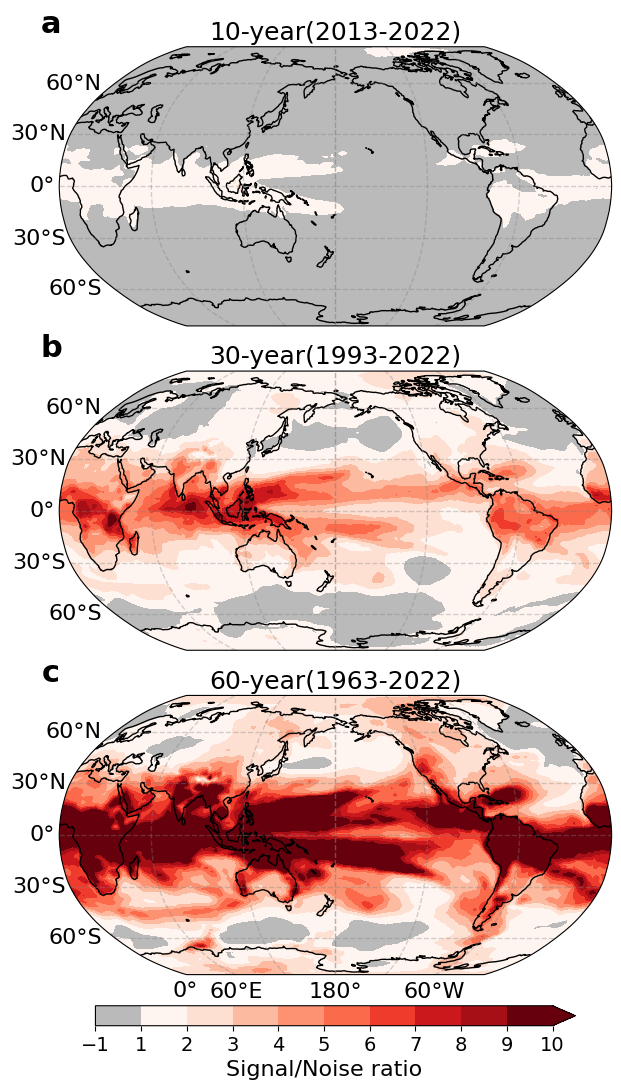

In [26]:
lat = SNR_trend_pattern_ds.lat.values
lon = SNR_trend_pattern_ds.lon.values

titles = ["10-year(2013-2022)", "30-year(1993-2022)", "60-year(1963-2022)"]
titles_left = ["a", "b", "c"]

import cartopy.util as cutil

# Create figure with constrained_layout
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
gs = gridspec.GridSpec(3, 1, figure=fig, height_ratios=[1, 1, 1])
levels = intervals
extend = 'max'

# 10-year plot (top-left)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(180))

Ratio_data = SNR_trend_pattern_ds['SNR_10_trend'].isel(run=10).values
Ratio_with_cyclic, lon_with_cyclic = cutil.add_cyclic_point(Ratio_data, coord=lon)
contour_obj = plot_trend(Ratio_with_cyclic, lat, lon_with_cyclic,levels=levels,extend=extend,
                    cmap=cmap,
                    norm=norm,
                    title=titles[0], ax=ax1, show_xticks = False, show_yticks = True)
ax1.text(-0.015, 1.08, titles_left[0], fontsize=22, weight='bold', ha='center', va='center',
            rotation='horizontal', transform=ax1.transAxes)

# 30-year plot (top-right)
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.Robinson(180))

Ratio_data1 = SNR_trend_pattern_ds['SNR_30_trend'].isel(run=10).values
Ratio_with_cyclic1, lon_with_cyclic = cutil.add_cyclic_point(Ratio_data1, coord=lon)
contour_obj1 = plot_trend(Ratio_with_cyclic1, lat, lon_with_cyclic,levels=levels,extend=extend,
                    cmap=cmap,
                    norm=norm,
                    title=titles[1], ax=ax2, show_xticks = False, show_yticks = True)
ax2.text(-0.015, 1.08, titles_left[1], fontsize=22, weight='bold', ha='center', va='center',
            rotation='horizontal', transform=ax2.transAxes)
# 60-year plot (bottom-center)
# fig = plt.figure(figsize=(20, 10))

ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.Robinson(180))
# define the figure size and projection
Ratio_data2 = SNR_trend_pattern_ds['SNR_70_trend'].isel(run=10).values
Ratio_with_cyclic2, lon_with_cyclic = cutil.add_cyclic_point(Ratio_data2, coord=lon)

contour_obj2 = plot_trend(Ratio_with_cyclic2, lat, lon_with_cyclic,levels=levels,extend=extend,
                    cmap=cmap,
                    norm=norm,
                    title=titles[2], ax=ax3, show_xticks = True, show_yticks = True)
ax3.text(-0.015, 1.08, titles_left[2], fontsize=22, weight='bold', ha='center', va='center',
            rotation='horizontal', transform=ax3.transAxes)

cbar_ax = fig.add_axes([0.34, -0.02, 0.32, 0.02])
cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal',ticks=[-1.0, 1.0, 2.0, 3.0, 4.0,5.0,
            6.0, 7.0, 8.0, 9.0, 10.0], extend='max')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Signal/Noise ratio', fontsize=16)

fig.savefig('SNR_Check_LongTerm.png', dpi=300, bbox_inches='tight')

plt.show()

### Steps:
1. Stack the SNR values for each trend length: This will give each grid point a series of SNR values corresponding to different trend lengths.
2. Find the first trend length where SNR >= 1.0: For each grid point, check the SNR values across all trend lengths and identify the first trend length where SNR exceeds or equals 1.0.
3. Store the corresponding trend length: Create a 2D array (lat × lon) where each grid point holds the first trend length that meets the SNR condition.
4. Plot the results: Use contour shading to visualize the trend length where SNR first exceeds 1.0.

In [27]:
# Define the range of trend lengths you're analyzing
trend_lengths = np.arange(10, 74)

# Stack the data into a new dimension for trend lengths
stacked_snr = xr.concat([SNR_trend_pattern_ds[f'SNR_{t}_trend'] for t in trend_lengths], dim='trend_length')
stacked_snr = stacked_snr.assign_coords(trend_length=trend_lengths)

In [28]:
stacked_snr

<xarray.DataArray 'SNR_10_trend' (trend_length: 64, run: 32, lat: 90, lon: 180)> Size: 265MB
dask.array<concatenate, shape=(64, 32, 90, 180), dtype=float64, chunksize=(1, 32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height        float64 8B 2.0
  * run           (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32
  * lat           (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon           (lon) float64 1kB 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
    period        <U9 36B '2013-2022'
    variable      <U3 12B ...
  * trend_length  (trend_length) int64 512B 10 11 12 13 14 15 ... 69 70 71 72 73

In [29]:
type(stacked_snr.trend_length)

xarray.core.dataarray.DataArray

In [30]:
# # Define a function to find the first occurrence of SNR >= 1.0
# def first_valid_trend_length(snr_data):
#     # Use np.argmax to find the first index where SNR >= 1.0
#     condition = snr_data >= 1.0
#     first_valid_idx = np.argmax(condition, axis=0)
    
#     # If no valid index is found, set to NaN (ignore if all are less than 1.0)
#     no_valid = np.all(~condition, axis=0)
#     first_valid_idx[no_valid] = np.nan
    
#     return first_valid_idx

In [31]:
def first_valid_trend_length(snr_values):
    """
    Find the first trend length where SNR >= 1.0.
    
    Args:
    - snr_values (np.ndarray): Array of SNR values for a specific grid point across all trend lengths.
    
    Returns:
    - first_valid_idx (np.ndarray or float): The index of the first trend length where SNR >= 1.0, 
                                             or NaN if no such trend length is found.
    """
    # Mask negative SNR values by treating them as NaN
    # snr_values = np.where(snr_values < 0, np.nan, snr_values)

    # Check where SNR is >= 1.0
    condition = abs(snr_values) > 1.0
    
    # Get the index of the first valid trend length where SNR >= 1.0
    if np.any(condition):
        first_valid_idx = np.argmax(condition, axis=0)
    else:
        first_valid_idx = np.nan  # Return NaN if no trend length satisfies the condition
    
    return first_valid_idx

In [32]:
trend_lengths

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73])

In [33]:
# Apply the function to find the first trend length where SNR >= 1.0
first_trend_idx = xr.apply_ufunc(
    first_valid_trend_length, 
    stacked_snr.chunk(dict(trend_length=-1),{"run": -1}),  # Ensure the data is chunked along the trend_length dimension
    input_core_dims=[['trend_length']],  # Apply function along each grid point
    vectorize=True,                      # Apply in a vectorized way
    dask='parallelized',                 # Enable parallel computation with Dask
    output_dtypes=[float],               # Output will be float (since it may contain NaN)
)

/tmp/ipykernel_575097/1732556877.py:4: FutureWarning: Passing 'name_prefix' as positional argument(s) to chunk was deprecated in version v2023.10.0 and will raise an error two releases later. Please pass them as keyword arguments.
  stacked_snr.chunk(dict(trend_length=-1),{"run": -1}),  # Ensure the data is chunked along the trend_length dimension


In [34]:
first_trend_idx

<xarray.DataArray 'SNR_10_trend' (run: 32, lat: 90, lon: 180)> Size: 4MB
dask.array<transpose, shape=(32, 90, 180), dtype=float64, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
    height    float64 8B 2.0
  * run       (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat       (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon       (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    period    <U9 36B '2013-2022'
    variable  <U3 12B ...

In [35]:
# Step 1: Convert first_trend_idx to integers, but keep NaNs intact
first_trend_idx_int = first_trend_idx.fillna(-1).astype(int)  # Replace NaNs with -1 temporarily

# Step 2: Map indices to actual trend lengths
first_trend_length_array = xr.DataArray(
    np.where(first_trend_idx_int >= 0, trend_lengths[first_trend_idx_int], np.nan),  # Use trend lengths for valid indices, NaN for invalid
    dims=['run','lat', 'lon'],  # Keep lat/lon dimensions
    coords={'run': first_trend_idx.run,'lat': first_trend_idx.lat, 'lon': first_trend_idx.lon}
)

In [36]:
print(np.unique(first_trend_length_array.values))

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.
 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. nan]


In [37]:
type(first_trend_length_array)

xarray.core.dataarray.DataArray

In [38]:
print(first_trend_length_array.shape)

(32, 90, 180)


In [39]:
first_trend_length_array

<xarray.DataArray (run: 32, lat: 90, lon: 180)> Size: 4MB
array([[[28., 28., 28., ..., 28., 28., 28.],
        [29., 29., 29., ..., 29., 29., 29.],
        [31., 31., 31., ..., 31., 31., 31.],
        ...,
        [13., 13., 13., ..., 11., 12., 13.],
        [11., 12., 12., ..., 11., 11., 11.],
        [11., 11., 11., ..., 11., 11., 11.]],

       [[21., 21., 21., ..., 21., 21., 21.],
        [20., 20., 20., ..., 20., 20., 20.],
        [21., 20., 20., ..., 20., 20., 20.],
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],

       [[24., 24., 24., ..., 24., 24., 24.],
        [24., 23., 23., ..., 24., 24., 24.],
        [24., 24., 24., ..., 24., 24., 25.],
        ...,
...
        ...,
        [10., 10., 10., ..., 12., 11., 11.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],

       [[19., 19., 16., ..., 17., 17., 17.],
        [16., 16., 16., ..., 19., 19., 19.],
        [14., 16., 16., ..., 19., 19., 20.],
        ...,
        [13., 13., 13., ..., 14., 14., 14.],
        [12., 12., 12., ..., 12., 12., 13.],
        [11., 11., 11., ..., 11., 11., 11.]],

       [[26., 26., 26., ..., 26., 26., 26.],
        [28., 28., 28., ..., 28., 28., 28.],
        [28., 28., 28., ..., 28., 28., 27.],
        ...,
        [13., 14., 14., ..., 13., 13., 13.],
        [12., 12., 12., ..., 12., 12., 12.],
        [11., 11., 11., ..., 11., 11., 11.]]])
Coordinates:
  * run      (run) int64 256B 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0

In [40]:
#save the emergence data 
dir_out = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_IPSL/output/'
first_trend_length_array.to_netcdf(dir_out + 'IPSL_emergence_timescale.nc')

In [41]:
# output the ensemble mean of the first valid trend length in run dimension

first_trend_length_array_mean = first_trend_length_array.mean(dim='run')

In [42]:
def plot_trend(lons, lats, data, levels=None, extend=None, cmap=None, norm=None,
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """
# Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
        
    # contour_obj = ax.contourf(lons, lats, data, levels=levels, extend=extend, 
    #                         cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    # Assuming lons, lats, data, levels, cmap, norm, and extend are already defined
    pcolormesh_obj = ax.pcolormesh(lons, lats, data, norm=norm, cmap=cmap, shading='auto',
                                   transform=ccrs.PlateCarree())
    # pcolormesh_obj = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, 
    # add_colorbar=False)

    # Plot significance masks with different hatches
    # ax.contourf(lons, lats, significance_mask, levels=[0.05, 1.0],hatches=['///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=1, linestyle='--',
                      color='gray', alpha=0.35)

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=24, pad=5.0)

    return pcolormesh_obj

In [43]:
# Check for NaN values
nan_indices = np.isnan(first_trend_length_array)

# Now you can print or analyze these points
print("NaN indices:", np.where(nan_indices))


NaN indices: (array([ 0,  0,  0, ..., 31, 31, 31]), array([ 3,  3,  3, ..., 19, 61, 71]), array([ 88,  89,  90, ..., 121,  45, 170]))


In [44]:
# # WH box (lat 42 to 60, lon 310 to 350)
# wh_box = first_trend_length_array.sel(lat=slice(42, 60), lon=slice(310, 350))
# print("WH Box First Trend Length Values:\n", wh_box.values)

In [45]:
# so_box = first_trend_length_array.sel(lat=slice(-90, -42), lon=slice(180, 200))
# print("SO Box First Trend Length Values:\n", so_box.values)

In [46]:
import copy
import matplotlib as mpl
import matplotlib.colors as mcolors
import palettable
import cartopy.util as cutil
import numpy.ma as ma

# cmdict = cmocean.cm.matter
# norm = mcolors.Normalize(vmin=10, vmax=74)

In [47]:
print(trend_lengths)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73]


In [48]:
first_trend_length_array.isel(run=0).values

array([[28., 28., 28., ..., 28., 28., 28.],
       [29., 29., 29., ..., 29., 29., 29.],
       [31., 31., 31., ..., 31., 31., 31.],
       ...,
       [13., 13., 13., ..., 11., 12., 13.],
       [11., 12., 12., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.]])

In [49]:
first_trend_length_array_mean

<xarray.DataArray (lat: 90, lon: 180)> Size: 130kB
array([[23.21875, 23.21875, 23.125  , ..., 22.65625, 22.75   , 22.6875 ],
       [24.03125, 24.0625 , 24.     , ..., 23.59375, 23.59375, 23.625  ],
       [25.0625 , 24.96875, 24.71875, ..., 24.75   , 24.84375, 24.8125 ],
       ...,
       [12.09375, 12.1875 , 12.3125 , ..., 11.9375 , 12.0625 , 12.15625],
       [11.28125, 11.34375, 11.40625, ..., 11.28125, 11.28125, 11.3125 ],
       [10.9375 , 10.9375 , 10.9375 , ..., 10.875  , 10.90625, 10.9375 ]])
Coordinates:
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0

In [50]:
# save the emergence time scale of ensemble mean
dir_out = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_IPSL/output/'
first_trend_length_array_mean.to_netcdf(dir_out + 'IPSL_emergence_timescale_mean.nc')

Shape of Ratio_with_cyclic: (90, 181)
Shape of lon_with_cyclic: (181,)
Shape of SNR_trend_pattern_ds.lat: (90,)


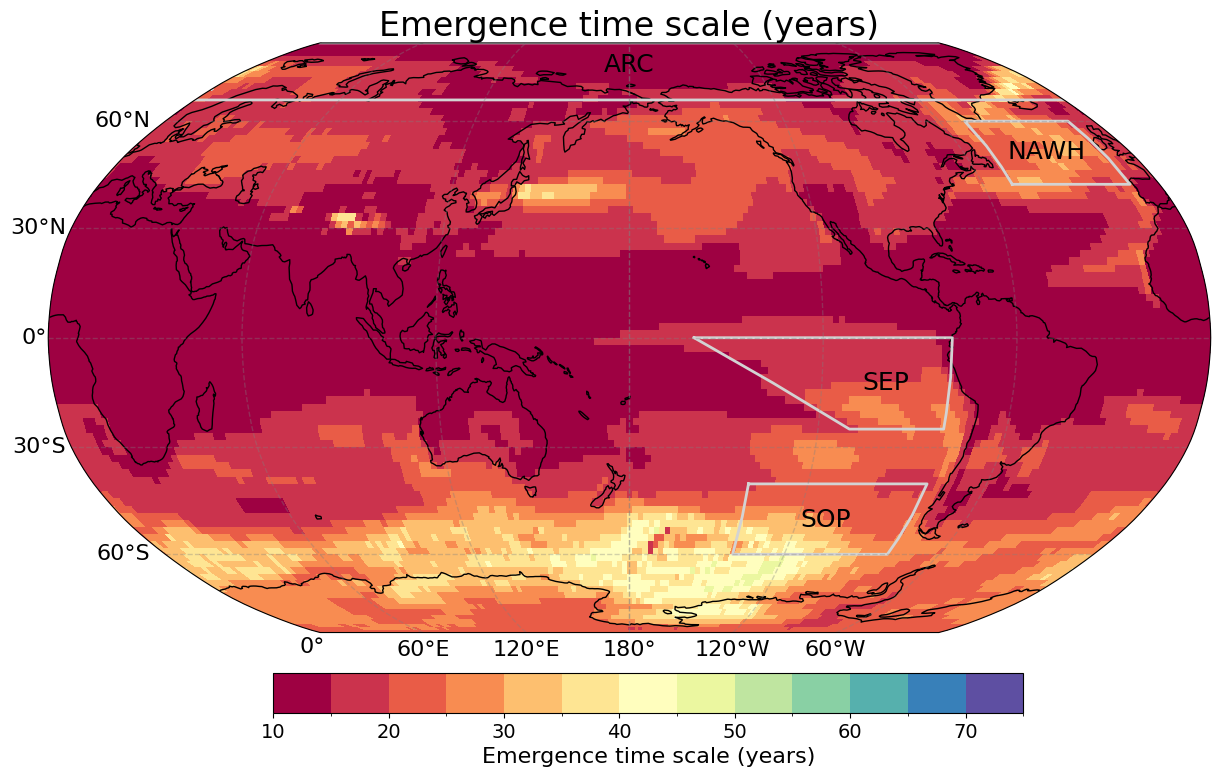

In [51]:
# Plot the first trend length where SNR >= 1.0
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(180)})

trend_lengths = np.arange(10, 80, 5)  # Define the range of trend lengths
# Make a copy of the colormap before modifying it
cmap = plt.get_cmap("Spectral") #copy.copy(plt.get_cmap('OrRd_r'))  # Use 'OrRd_r' reversed colormap
# Define BoundaryNorm for discrete colormap intervals
norm = BoundaryNorm(trend_lengths, cmap.N)  # cmap.N defines the number of colors in the colormap

extend = 'neither'  # No extension beyond the colormap range
# cmdict_r = cmdict.reversed()

data_plot = first_trend_length_array_mean.values
# Mask invalid data (NaN or Inf values)
masked_array = ma.masked_invalid(data_plot)

# Add cyclic point to data and longitude
Ratio_with_cyclic, lon_with_cyclic = cutil.add_cyclic_point(masked_array, coord=first_trend_length_array.lon)

# Check the shapes to ensure consistency
print("Shape of Ratio_with_cyclic:", Ratio_with_cyclic.shape)
print("Shape of lon_with_cyclic:", lon_with_cyclic.shape)
print("Shape of SNR_trend_pattern_ds.lat:", SNR_trend_pattern_ds.lat.shape)

# Plot the data (ensure 'contour' is the correct mappable object)
pcolormesh_plot = plot_trend(lon_with_cyclic, SNR_trend_pattern_ds.lat, Ratio_with_cyclic,
                                    levels=trend_lengths, extend=extend, cmap=cmap, norm=norm,
                                        title='Emergence time scale (years)', ax=ax, show_xticks=True, show_yticks=True)


# Add the regional outlines and calculate midpoints for labels:
# Arctic box
arctic_lon_mid = (0 + 360) / 2
arctic_lat_mid = (66.5 + 90) / 2
ax.plot([0, 360, 360, 0, 0], [66.5, 66.5, 90, 90, 66.5],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(arctic_lon_mid, arctic_lat_mid, 'ARC', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for Arctic

# WH box
wh_lon_mid = (310 + 350) / 2
wh_lat_mid = (42 + 60) / 2
box_lons = np.array([310, 350, 350, 310, 310])
box_lats = np.array([42, 42, 60, 60, 42])
ax.plot(box_lons, box_lats, color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(wh_lon_mid, wh_lat_mid, 'NAWH', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for WH

# Southeast Pacific box
sep_lon_mid = (200 + 320) / 2
sep_lat_mid = (0 + -25) / 2
ax.plot([200%360, 280%360, 280%360, 250%360, 200%360], [0, 0, -25, -25, 0],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(sep_lon_mid, sep_lat_mid, 'SEP', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for SEP

# Extratropical South Pacific box
sop_lon_mid = (220 + 280) / 2
sop_lat_mid = (-40 + -60) / 2
ax.plot([220%360, 280%360, 280%360, 220%360, 220%360], [-40, -40, -60, -60, -40],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(sop_lon_mid, sop_lat_mid, 'SOP', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for SOP
# Add colorbar for the plot

cbar_ax = fig.add_axes([0.275, 0.12, 0.5, 0.04])
cbar = plt.colorbar(pcolormesh_plot, cax=cbar_ax, orientation='horizontal')
# # Customize the colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Emergence time scale (years)', fontsize=16)

fig.savefig('Emergence_Trend_Length.png', dpi=300, bbox_inches='tight')
fig.savefig('Emergence_Trend_Length.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# %%
fig, ax = plt.subplots(figsize=(15, 10),
    subplot_kw={"projection": ccrs.Robinson(180)},
)
ax.coastlines(resolution='110m')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=1, linestyle='--',
                      color='gray', alpha=0.35)

# Disable labels on the top and right of the plot
gl.top_labels = False
gl.right_labels = False

# Enable labels on the bottom and left of the plot with custom formatters and styles
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.xlabel_style = {'size':18}
gl.ylabel_style = {'size':18}
gl.bottom_labels = True
gl.left_labels = True

# Add the regional outlines and calculate midpoints for labels:
# Arctic box
arctic_lon_mid = (0 + 360) / 2
arctic_lat_mid = (66.5 + 90) / 2
ax.plot([0, 360, 360, 0, 0], [66.5, 66.5, 90, 90, 66.5],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(arctic_lon_mid, arctic_lat_mid, 'ARC', color='black', fontsize=22, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for Arctic

# WH box
wh_lon_mid = (310 + 350) / 2
wh_lat_mid = (42 + 60) / 2
box_lons = np.array([310, 350, 350, 310, 310])
box_lats = np.array([42, 42, 60, 60, 42])
ax.plot(box_lons, box_lats, color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(wh_lon_mid, wh_lat_mid, 'NAWH', color='black', fontsize=22, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for WH

# Southeast Pacific box
sep_lon_mid = (200 + 320) / 2
sep_lat_mid = (0 + -25) / 2
ax.plot([200%360, 280%360, 280%360, 250%360, 200%360], [0, 0, -25, -25, 0],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(sep_lon_mid, sep_lat_mid, 'SEP', color='black', fontsize=22, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for SEP

# Extratropical South Pacific box
sop_lon_mid = (220 + 280) / 2
sop_lat_mid = (-40 + -60) / 2
ax.plot([220%360, 280%360, 280%360, 220%360, 220%360], [-40, -40, -60, -60, -40],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(sop_lon_mid, sop_lat_mid, 'SOP', color='black', fontsize=22, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for SOP

# Plot the data with the correct colormap and levels
cmap = plt.get_cmap("Spectral")  # Use reversed OrRd colormap OrRd_r
p = first_trend_length_array_mean.plot(ax=ax, extend='max', transform=ccrs.PlateCarree(), cmap=cmap, 
              levels=np.arange(10, 80, 5), add_colorbar=False)
# Set the plot title
# ax.set_title("Emergence timescale of warming trends", loc='center', fontsize=26, pad=10)

# Add a horizontal colorbar below the plot
cbar_ax = fig.add_axes([0.275, 0.12, 0.5, 0.04])
cbar = plt.colorbar(p, cax=cbar_ax, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Emergence timescale (years) with S/N > 1', fontsize=22)
cbar.set_ticks(np.arange(10, 80, 5))
cbar.ax.set_xticklabels([str(int(t)) for t in np.arange(10, 80, 5)])

fig.savefig('Emergence_Trend_Length_IPSL_ENS.png', dpi=300, bbox_inches='tight')
fig.savefig('Emergence_Trend_Length_IPSL_ENS.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
pcolormesh_plot.colorbar

In [ ]:
cbar_ax = fig.add_axes([0.275, 0.12, 0.5, 0.04])  # Adjust size and position of the colorbar

In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming SNR_data is your dataset containing the SNR values
# SNR_data = SNR_trend_pattern_ds

# # Get the dimensions for latitude and longitude
# lat_size = SNR_data.dims['lat']
# lon_size = SNR_data.dims['lon']

# # Initialize an array to store the first trend length where SNR >= 1.0 for each grid point
# first_trend_length_array = np.full((lat_size, lon_size), np.nan)

# # Define the range of trend lengths you're analyzing
# trend_lengths = np.arange(10, 74)  # From 10 to 73 years

# # Loop through each grid point (lat, lon)
# for i in range(lat_size):
#     for j in range(lon_size):
#         # Extract the SNR values for the current grid point across all trend lengths
#         snr_values = np.array([SNR_data[f'SNR_{t}_trend'].isel(lat=i, lon=j).values for t in trend_lengths])
        
#         # Find the first trend length where SNR >= 1.0
#         first_valid_index = np.argmax(snr_values >= 1.0) if np.any(snr_values >= 1.0) else None
        
#         # If a valid index is found, mark the corresponding trend length
#         if first_valid_index is not None and snr_values[first_valid_index] >= 1.0:
#             first_trend_length_array[i, j] = trend_lengths[first_valid_index]

# # Plot the first trend length for each grid point where SNR >= 1.0
# plt.figure(figsize=(10, 6))
# plt.contourf(SNR_data.lon, SNR_data.lat, first_trend_length_array, cmap='coolwarm', levels=np.arange(10, 74, 1))
# plt.colorbar(label='First Trend Length (years) with SNR >= 1.0')
# plt.title('First Trend Length where SNR >= 1.0 for each Grid Point')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# plt.show()


In [ ]:
# client.close()
# scluster.close()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(180)})
ax.set_global()

p = first_trend_length_array.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()



In [ ]:
first_trend_length_array.to_netcdf("/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure3/data/fig3_final/fig3_final.nc")

### 